In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('ishant file.csv', encoding='unicode_escape')

# Display basic information about the dataset
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1048575 non-null  object 
 1   StockCode    1048575 non-null  object 
 2   Description  1044203 non-null  object 
 3   Quantity     1048575 non-null  int64  
 4   InvoiceDate  1048575 non-null  object 
 5   Price        1048575 non-null  float64
 6   Customer ID  811893 non-null   float64
 7   Country      1048575 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 64.0+ MB
None
           Quantity         Price    Customer ID
count  1.048575e+06  1.048575e+06  811893.000000
mean   9.957525e+00  4.627346e+00   15324.712265
std    1.335187e+02  1.228024e+02    1697.033034
min   -7.421500e+04 -5.359436e+04   12346.000000
25%    1.000000e+00  1.250000e+00   13971.000000
50%    3.000000e+00  2.100000e+00   15260.000000
75%    1.000000e+01  4.150000e+00   1

In [ ]:
# Step 1: Handle missing values
print("Missing values before cleaning:")
print(df.isnull().sum())

# Remove rows with missing values
df = df.dropna()

print("\nMissing values after cleaning:")
print(df.isnull().sum())

# Step 2: Remove duplicates
df = df.drop_duplicates()

# Step 3: Convert 'InvoiceDate' to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Step 4: Handle outliers in 'Quantity' and 'Price'
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df = remove_outliers(df, 'Quantity')
df = remove_outliers(df, 'Price')

# Step 5: Create a 'TotalAmount' column
df['TotalAmount'] = df['Quantity'] * df['Price']

print("\nDataset shape after cleaning:", df.shape)

Missing values before cleaning:
Invoice             0
StockCode           0
Description      4372
Quantity            0
InvoiceDate         0
Price               0
Customer ID    236682
Country             0
dtype: int64

Missing values after cleaning:
Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

Dataset shape after cleaning: (665530, 9)


            Quantity                    InvoiceDate          Price  \
count  665530.000000                         665530  665530.000000   
mean        7.193829  2010-12-28 11:09:55.346446080       2.291937   
min       -13.000000            2009-12-01 07:45:00       0.000000   
25%         2.000000            2010-06-29 15:28:00       1.250000   
50%         5.000000            2010-11-28 16:21:00       1.690000   
75%        12.000000            2011-07-24 12:20:00       2.950000   
max        27.000000            2011-12-04 13:15:00       7.500000   
std         6.821098                            NaN       1.616992   

         Customer ID    TotalAmount  
count  665530.000000  665530.000000  
mean    15343.634801      12.621962  
min     12346.000000     -87.750000  
25%     13988.000000       3.750000  
50%     15303.000000      10.200000  
75%     16810.000000      17.340000  
max     18287.000000     182.250000  
std      1693.814406      13.607077  


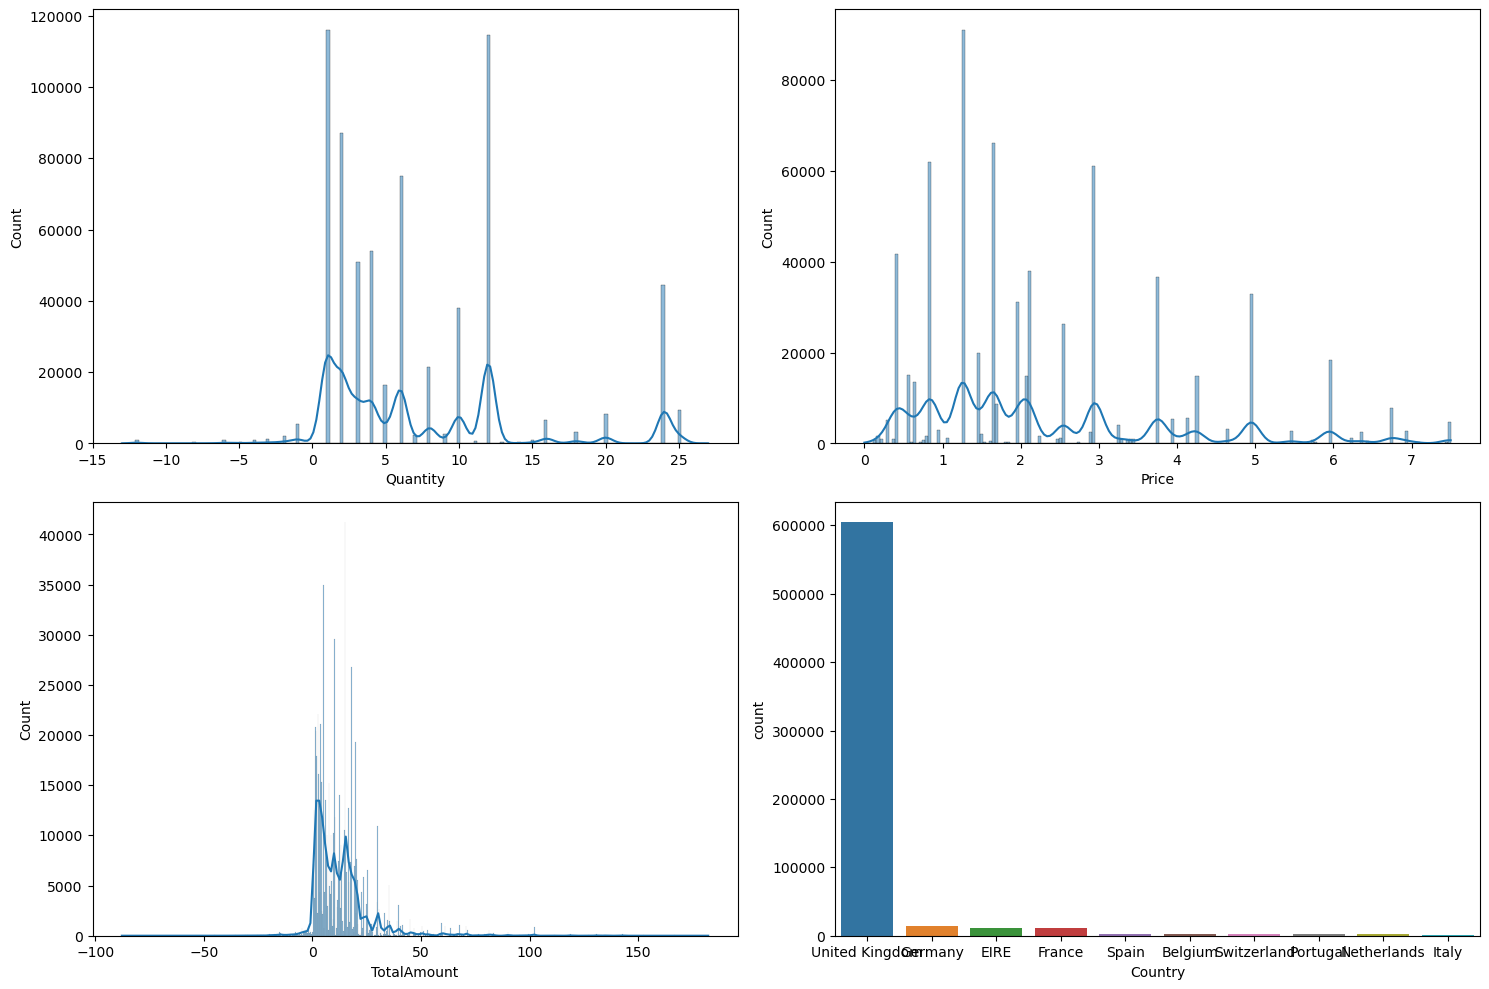

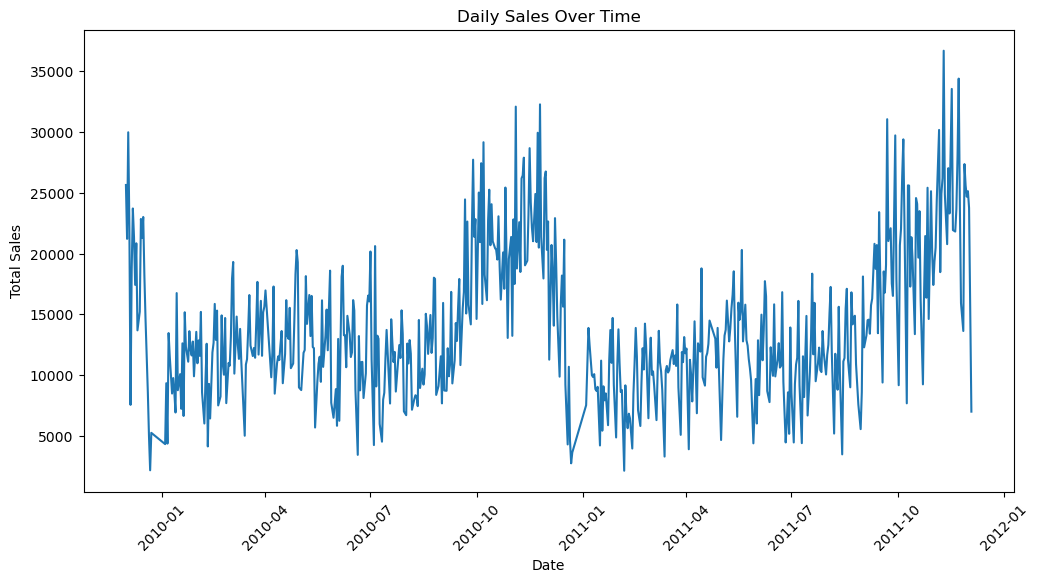

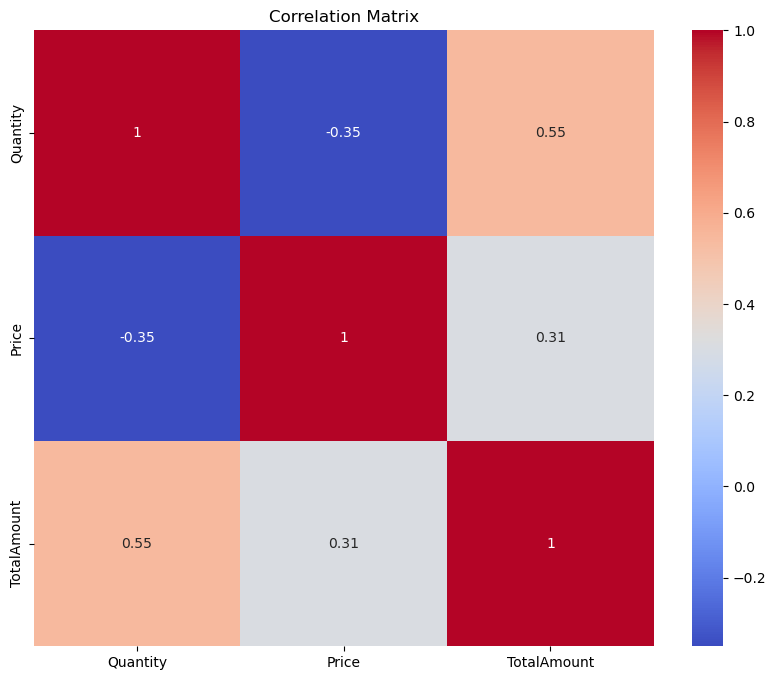

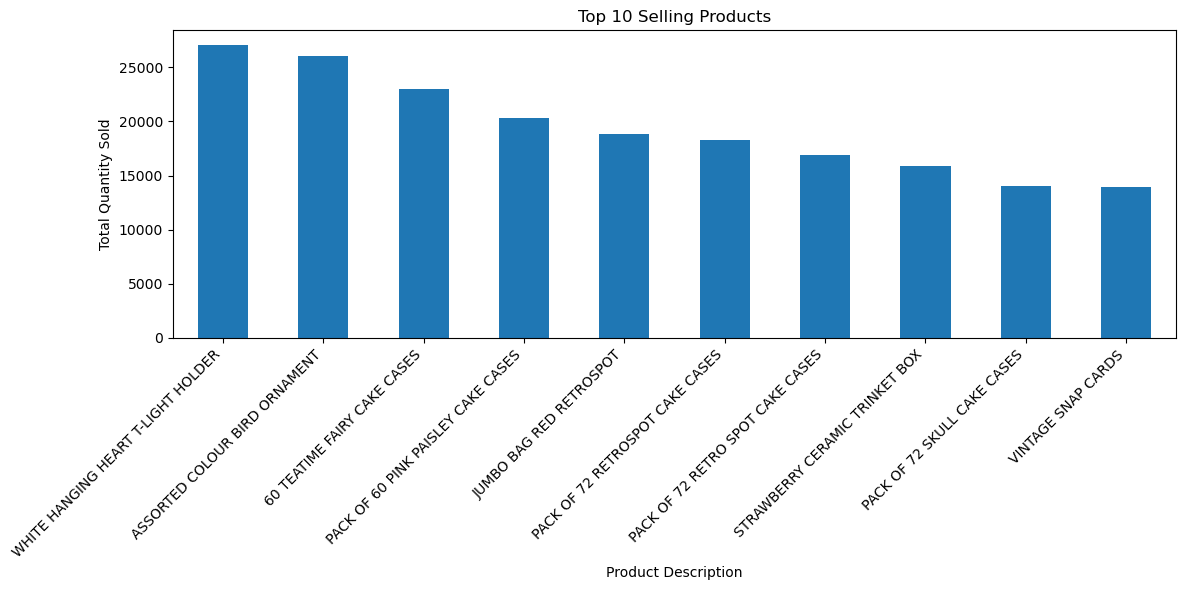

           Recency     Frequency       Monetary
count  5692.000000   5692.000000    5692.000000
mean    199.507906    116.923753    1475.807117
std     207.875077    298.814917    3616.586434
min       0.000000      1.000000    -547.230000
25%      24.000000     18.000000     236.800000
50%     100.000000     46.000000     580.705000
75%     374.000000    121.000000    1496.695000
max     733.000000  11504.000000  167788.350000


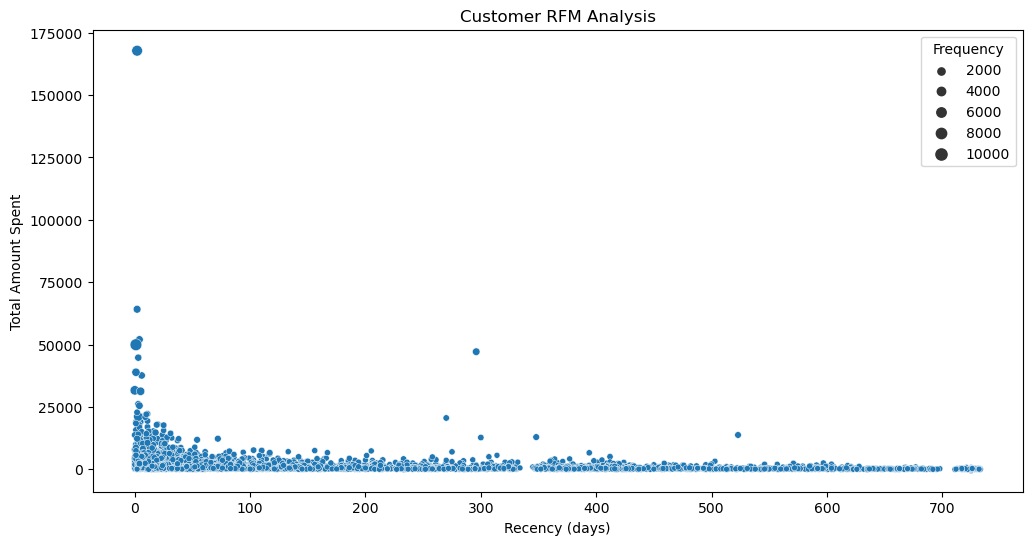

In [ ]:
# Step 1: Basic statistics
print(df.describe())

# Step 2: Distribution of numerical variables
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.histplot(df['Quantity'], kde=True, ax=axes[0, 0])
sns.histplot(df['Price'], kde=True, ax=axes[0, 1])
sns.histplot(df['TotalAmount'], kde=True, ax=axes[1, 0])
sns.countplot(x='Country', data=df, order=df['Country'].value_counts().index[:10], ax=axes[1, 1])
plt.tight_layout()
plt.show()

# Step 3: Time series analysis
df['Date'] = df['InvoiceDate'].dt.date
daily_sales = df.groupby('Date')['TotalAmount'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Date'], daily_sales['TotalAmount'])
plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

# Step 4: Correlation analysis
correlation_matrix = df[['Quantity', 'Price', 'TotalAmount']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Step 5: Top selling products
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
top_products.plot(kind='bar')
plt.title('Top 10 Selling Products')
plt.xlabel('Product Description')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Step 6: Customer analysis
customer_rfm = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (df['InvoiceDate'].max() - x.max()).days,
    'Invoice': 'count',
    'TotalAmount': 'sum'
})
customer_rfm.columns = ['Recency', 'Frequency', 'Monetary']
print(customer_rfm.describe())

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Recency', y='Monetary', size='Frequency', data=customer_rfm)
plt.title('Customer RFM Analysis')
plt.xlabel('Recency (days)')
plt.ylabel('Total Amount Spent')
plt.show()

Feature Engineering

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# 1. Create a 'TotalAmount' feature
df['TotalAmount'] = df['Quantity'] * df['Price']

In [ ]:
# 2. Extract time-based features from 'InvoiceDate'
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek
df['Hour'] = df['InvoiceDate'].dt.hour

In [ ]:
# 3. Create a 'IsWeekend' feature
df['IsWeekend'] = df['DayOfWeek'].isin([5, 6]).astype(int)

In [ ]:
# 4. Handle categorical variables
le = LabelEncoder()
df['CountryEncoded'] = le.fit_transform(df['Country'])

In [ ]:
# 5. Create a 'CustomerSegment' feature based on total spending
customer_total_spend = df.groupby('Customer ID')['TotalAmount'].sum()
df['CustomerSegment'] = pd.cut(customer_total_spend, bins=3, labels=['Low', 'Medium', 'High'])

In [ ]:
# 6. Create a 'ProductPopularity' feature
product_popularity = df.groupby('StockCode')['Quantity'].sum()
df['ProductPopularity'] = df['StockCode'].map(product_popularity)

In [ ]:
# 7. Create a 'CustomerFrequency' feature
customer_frequency = df.groupby('Customer ID')['Invoice'].nunique()
df['CustomerFrequency'] = df['Customer ID'].map(customer_frequency)

In [ ]:
# 8. Create a 'SeasonalPurchase' feature
df['Season'] = pd.cut(df['Month'], bins=[0, 3, 6, 9, 12], labels=['Winter', 'Spring', 'Summer', 'Fall'])

In [ ]:
# 9. Log transform 'Price' and 'Quantity' to handle skewness
df['LogPrice'] = np.log1p(df['Price'])
df['LogQuantity'] = np.log1p(df['Quantity'])

e:\PYTHON\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
e:\PYTHON\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
# 10. Create interaction features
df['PriceQuantityInteraction'] = df['LogPrice'] * df['LogQuantity']

In [ ]:
# Display the new dataset info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 665530 entries, 0 to 1048574
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Invoice                   665530 non-null  object        
 1   StockCode                 665530 non-null  object        
 2   Description               665530 non-null  object        
 3   Quantity                  665530 non-null  int64         
 4   InvoiceDate               665530 non-null  datetime64[ns]
 5   Price                     665530 non-null  float64       
 6   Customer ID               665530 non-null  float64       
 7   Country                   665530 non-null  object        
 8   TotalAmount               665530 non-null  float64       
 9   Date                      665530 non-null  object        
 10  Year                      665530 non-null  int32         
 11  Month                     665530 non-null  int32         
 12  Day   

In [ ]:
# Save the engineered dataset
df.to_csv('engineered_dataset.csv', index=False)
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalAmount,Date,...,Hour,IsWeekend,CountryEncoded,CustomerSegment,ProductPopularity,CustomerFrequency,Season,LogPrice,LogQuantity,PriceQuantityInteraction
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009-12-01,...,7,0,38,NaN,1047,9,Fall,2.073172,2.564949,5.317581
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12-01,...,7,0,38,NaN,1388,9,Fall,2.047693,2.564949,5.252228
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12-01,...,7,0,38,NaN,2012,9,Fall,2.047693,2.564949,5.252228
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,2009-12-01,...,7,0,38,NaN,16562,9,Fall,0.810930,3.218876,2.610284
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom,39.6,2009-12-01,...,7,0,38,NaN,3451,9,Fall,0.974560,3.218876,3.136986


Model Selection

In [ ]:
# 1. RFM Features

# Calculate Recency
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])  # Ensure InvoiceDate is in datetime format
recent_date = df['InvoiceDate'].max()
df['Recency'] = (recent_date - df['InvoiceDate']).dt.days

# Calculate Frequency
frequency_df = df.groupby('Customer ID')['Invoice'].nunique().reset_index(name='Frequency')

# Calculate Monetary Value
df['TotalValue'] = df['Quantity'] * df['Price']
monetary_df = df.groupby('Customer ID')['TotalValue'].sum().reset_index(name='MonetaryValue')

# Merge RFM features into a single DataFrame
rfm_df = pd.merge(frequency_df, monetary_df, on='Customer ID')
rfm_df = pd.merge(rfm_df, df[['Customer ID', 'Recency']], on='Customer ID')
rfm_df = rfm_df.drop_duplicates(subset=['Customer ID'])


# 2. Average Order Value (AOV)
rfm_df['AOV'] = rfm_df['MonetaryValue'] / rfm_df['Frequency']

# Number of unique products purchased
product_variety = df.groupby('Customer ID')['StockCode'].nunique().reset_index(name='UniqueProducts')
rfm_df = pd.merge(rfm_df, product_variety, on='Customer ID')

# 3. Time-Based Features

# Calculate Days Between Purchases (Illustrative - This can be complex depending on your needs)
# This example calculates the average days between orders for each customer
# This requires sorting the DataFrame by Customer ID and InvoiceDate
df = df.sort_values(['Customer ID', 'InvoiceDate'])

# Calculate the difference in days between consecutive InvoiceDates for each customer
df['DaysSincePreviousPurchase'] = df.groupby('Customer ID')['InvoiceDate'].diff().dt.days

days_between_purchases = df.groupby('Customer ID')['DaysSincePreviousPurchase'].mean().reset_index(name='AvgDaysBetweenPurchases')
rfm_df = pd.merge(rfm_df, days_between_purchases, on='Customer ID')

# 4. Customer Segmentation (Illustrative Example using K-means)
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select features for segmentation
features = rfm_df[['Recency', 'Frequency', 'MonetaryValue', 'AOV', 'UniqueProducts']]

# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply K-means clustering (you'll need to determine the optimal number of clusters)
kmeans = KMeans(n_clusters=5, random_state=42)  # Example with 5 clusters
rfm_df['Cluster'] = kmeans.fit_predict(scaled_features)

# Now you have an rfm_df DataFrame with engineered features and customer segments!
rfm_df.head()

e:\PYTHON\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Customer ID,Frequency,MonetaryValue,Recency,AOV,UniqueProducts,AvgDaysBetweenPurchases,Cluster
0,12346.0,14,356.37,720,25.455000,28,7.783784,0
1,12347.0,7,3663.19,398,523.312857,116,1.875648,3
2,12348.0,4,312.36,432,78.090000,21,7.560000,0
3,12349.0,4,2625.84,730,656.460000,111,5.078014,3
4,12350.0,1,294.40,304,294.400000,16,0.000000,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Select features and target variable
features = rfm_df[['Recency', 'Frequency', 'MonetaryValue', 'AOV', 'UniqueProducts', 'AvgDaysBetweenPurchases']]
target = rfm_df['MonetaryValue']  # You might want to define CLTV more specifically

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# For handline null values in rfm_df
# Create an imputer object with your chosen strategy
imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent'

# Fit the imputer on your training data and transform both training and testing data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the model
model = RandomForestRegressor(random_state=42, )
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 8494.162698111417
R-squared: 0.9981164069084288


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Predict CLTV for all customers

X_val = rfm_df[['Recency', 'Frequency', 'MonetaryValue', 'AOV', 'UniqueProducts', 'AvgDaysBetweenPurchases']]
X_val = imputer.transform(X_val)
X_val = scaler.transform(X_val)


rfm_df['PredictedCLTV'] = model.predict(X_val)

# Define CLTV buckets (adjust thresholds as needed)
def categorize_cltv(cltv):
    if cltv >= 1000:
        return 'High-Value'
    elif cltv >= 500:
        return 'Medium-Value'
    else:
        return 'Low-Value'
